In [11]:
import semiolog as slg

In [2]:
semiotic = slg.Cenematic("en_wiki_seg")

In [3]:
n = 20
print(semiotic.corpus.train[n])
sent = semiotic(semiotic.corpus.train[n])

The eventual owners of the brewery, Courage, closed the headquarters in 1964.


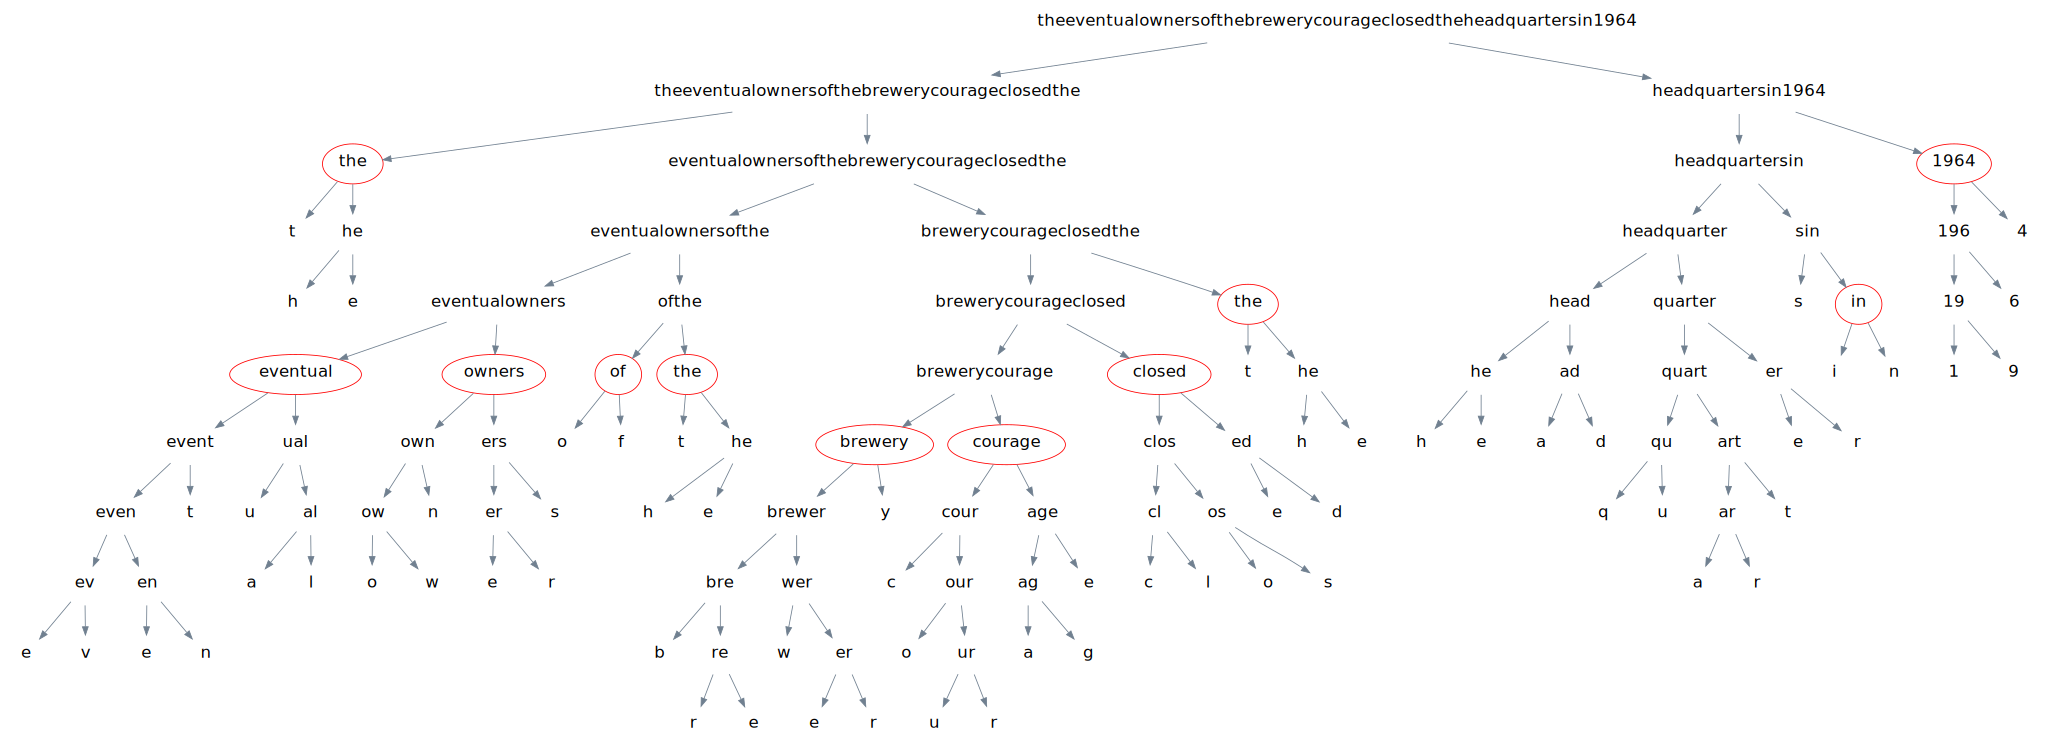

In [4]:
sent.tree.plot(sent.chain.nodes_split)

In [26]:
sent.parad_chain.df()

,the_0,1964_10,headquarter_8,sin_9,ofthe_3,the_7,eventual_1,owners_2,closed_6,brewery_4,courage_5
0,in,brewery,brewing,anniversary,ew,brewery,brewery,recently,ceased,by,brewery
1,circa,former,brewery,list,ised,and,previous,ly,brewery,at,ltd
2,july,original,great,s,tered,brewers,original,permanently,britannia,their,company
3,december,company,beer,closed,for,pub,following,largely,of,in,corporation
4,january,brewers,harvest,directory,ded,the,former,newly,were,to,pub
5,february,current,financial,order,after,owners,last,partially,bristol,the,closed
6,september,corporate,christmas,ship,d,by,distillery,officially,united,with,plc
7,march,joint,licensing,takeover,dened,company,pub,partly,royal,upon,limited
8,october,previous,final,sale,dled,bury,three,closure,amalgamated,under,premises
9,august,old,whisky,date,hala,property,two,temporarily,guinness,after,brewing


In [14]:
sent.type_chain.plot_scores(show_probs=False)